# **EE769: Introduction to Machine Learning**

## Assignment 2: ML for Smart Monkeys

### Assignment Description:
- Some experiments were conducted on mice to see if a treatment of Down’s syndrome works or not.
- Mice were divided into control and diseased (genotype), treated or untreated and whether it shows a particular behavior or not (treatment_behavior). 
- Readings for 77 proteins were recorded for the mice, but some of the readings were discarded if they seemed unreliable (out of range). 
- **Requirement:** To develop a pre-processing pipeline and a classifier, and also find out which subset of proteins is important in predicting which class.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
import sklearn.impute
import scipy.stats
plt.rcParams["figure.figsize"] = (20,11)

## Data Acquisition
**Train Data:** https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv

**Test Data:** https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv

In [ ]:
### Importing the training and test data.
data_train = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")
data_test = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")

## Exploratory Data Analysis

We shall now analyse the data and try to answer the following questions:

1. Which variables are usable, and which are not?
2. Are there significant correlations among variables?
3. Are the classes balanced?

In [ ]:
### Now, we take a look at the data.
display(data_train)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


As we can see, all the features are continuous variables and the outputs("Genotype" and "Treatment_Behaviour") are discrete variables. We have therefore a classification problem at hand. Also, let us note that some variables are missing from the given data. https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

In [ ]:
data_training_missing = data_train.isnull().sum() ### We calculate all missing variables. 
data_training_missing_percentage = data_training_missing.loc[data_training_missing!=0] ### We only choose columns with nan values
data_training_missing_percentage = data_training_missing_percentage*100/len(data_train) ### We convert to perecentage.
# print(len(data_train))
display(data_training_missing_percentage)

ELK_N          1.968504
MEK_N          0.524934
Bcatenin_N     1.968504
BAD_N         23.622047
BCL2_N        25.590551
pCFOS_N        7.874016
H3AcK18_N     19.685039
EGR1_N        23.622047
H3MeK4_N      23.622047
dtype: float64

As we can see, certain columns have about $\frac{1}{5}^{\text{th}}$ of data mssing. We discared these columns from our dataset. As imputing these columns, can significantly change the model and its performance. (https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe)

In [ ]:
nan_threshold = 0.19*100 ### Threshold in percentage.

unusable_labels = data_training_missing_percentage.loc[data_training_missing_percentage >= nan_threshold].to_frame() ### Threshold.
# print(list(unusable_labels.index))
data_train = data_train.drop(list(unusable_labels.index), axis=1) ### We remove all the unusuable features.
data_test = data_test.drop(list(unusable_labels.index), axis=1) ### Since, features of training and test data set must be same. 
display(data_train)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108234,1.044979,0.831557,0.188852,0.106305,0.108336,0.427099,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.109749,1.009883,0.849270,0.200404,0.106592,0.104315,0.441581,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108196,0.996848,0.846709,0.193685,0.108303,0.106219,0.435777,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.119883,0.990225,0.833277,0.192112,0.103184,0.111262,0.391691,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.119524,0.997775,0.878668,0.205604,0.104784,0.110694,0.434154,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.149263,1.136276,1.001404,0.216128,0.119428,0.115567,0.441207,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.154894,1.154191,1.043402,0.209717,0.118081,0.108944,0.444913,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.153154,1.195479,0.948795,0.211279,0.116134,0.114635,0.422789,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.154868,1.213194,0.995884,0.197436,0.120649,0.120649,0.459901,1.543274,Ts65Dn,Saline_S/C


At this juncture, we separate out the input and output variables.

In [ ]:
data_train_input = data_train.iloc[:,:-2] ### Everything except last two columns.
data_train_output = data_train.iloc[:,-2:] ### Last two columns.
data_test_input = data_test.iloc[:,:-2] ### Everything except last two columns.
data_test_output = data_test.iloc[:,-2:] ### Last two columns.

display(data_train_input, data_train_output)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.108336,0.427099,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.104315,0.441581,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.106219,0.435777,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.111262,0.391691,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.110694,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,1.622850,2.236925,0.149263,1.136276,1.001404,0.216128,0.119428,0.115567,0.441207,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,1.657617,2.274556,0.154894,1.154191,1.043402,0.209717,0.118081,0.108944,0.444913,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,1.504094,2.107139,0.153154,1.195479,0.948795,0.211279,0.116134,0.114635,0.422789,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,1.568203,2.212959,0.154868,1.213194,0.995884,0.197436,0.120649,0.120649,0.459901,1.543274


,Genotype,Treatment_Behavior
0,Control,Memantine_C/S
1,Control,Memantine_C/S
2,Control,Memantine_C/S
3,Control,Memantine_C/S
4,Control,Memantine_C/S
...,...,...
757,Ts65Dn,Saline_S/C
758,Ts65Dn,Saline_S/C
759,Ts65Dn,Saline_S/C
760,Ts65Dn,Saline_S/C


## Missing Values Multivariate imputation

Simple mean values sometimes do not work for data imputation. Looking at the data in the table it seems to be Missing At Random (MAR) and we can assume that we can use other features to impute this.
 Multivariate imputation uses other features also. We will be using the MICE: Multiple Imputation by Chained Equations (link below) approach for this a summary of which is as follows

1. A simple univariate imputation is performed for every variable with missing data, for example, median imputation.
2. One specific variable is selected, say, var_1, and the missing values are set back to missing.
3. A model that's used to predict var_1 is built based on the remaining variables in the dataset.
4. The missing values of var_1 are replaced with the new estimates.
Repeat step 2 to step 4 for each of the remaining variables.

Reference: Multiple Imputation by Chained Equations: What is it and how does it work?: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/

* We will use Scikit learns default implementation that uses a Bayesian Ridge esimator (default) for the imputation
* The number of iterations would be 10. 
* A copy of training data will be used and the categorical variables on Genotype and Training_Behaviour will be deleted.
* For all other floating point values this imputation can be carried out.
* Next we will add the Genotype and Training_Behavior

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

As the NaN values are all present in the continuous variables, we can delete the categorical variables, impute and add them back to the DataFrame.

We additionally separate out the input and output variables and normalize the features.
We impute before feature selection, since scikit algorithms are not guaranteed to work with NaN values.

In [ ]:
def dataprep(data):
    ### We now proceed to data imputation.
    impute = sklearn.impute.IterativeImputer()### Impute Object. No integral NaNs in data. 
    temp = impute.fit_transform(data) ### Imputed Data. Returns np array
    temp = pd.DataFrame(temp, columns=data.columns)  ### So that no information is lost, like headers.
    return temp

data_train_input = dataprep(data_train_input) 
data_test_input = dataprep(data_test_input)### Since, we train our model on an imputed feature set, we do the same for the test data.
display(data_train_input)


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.108336,0.427099,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.104315,0.441581,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.106219,0.435777,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.111262,0.391691,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.110694,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,1.622850,2.236925,0.149263,1.136276,1.001404,0.216128,0.119428,0.115567,0.441207,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,1.657617,2.274556,0.154894,1.154191,1.043402,0.209717,0.118081,0.108944,0.444913,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,1.504094,2.107139,0.153154,1.195479,0.948795,0.211279,0.116134,0.114635,0.422789,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,1.568203,2.212959,0.154868,1.213194,0.995884,0.197436,0.120649,0.120649,0.459901,1.543274


For the moment, let us focus on the output.

In [ ]:
print(data_test_output.info())
data_train_output.describe() ### What does the output look like??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genotype            225 non-null    object
 1   Treatment_Behavior  225 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB
None


,Genotype,Treatment_Behavior
count,762,762
unique,2,4
top,Control,Memantine_C/S
freq,435,225


## Correlation Between Variables and their Significance

We now check the correlation between the variables in our sample data.

Highly correlated variables have a stronger relationship and hence can be dropped and only one of them can be used for training instead. In our preliminary feature selection, we shall be eliminating the highly correlated variables and using only one of them. We keep the threshold at 0.85. 

There are better feature selection methods than the above like t-test and RFECV (Recursive Feature Elimination with Cross- Validation). We shall be using RFECV later on and comparing it to the naive method stated above to see if RFECV actually improves performance. 

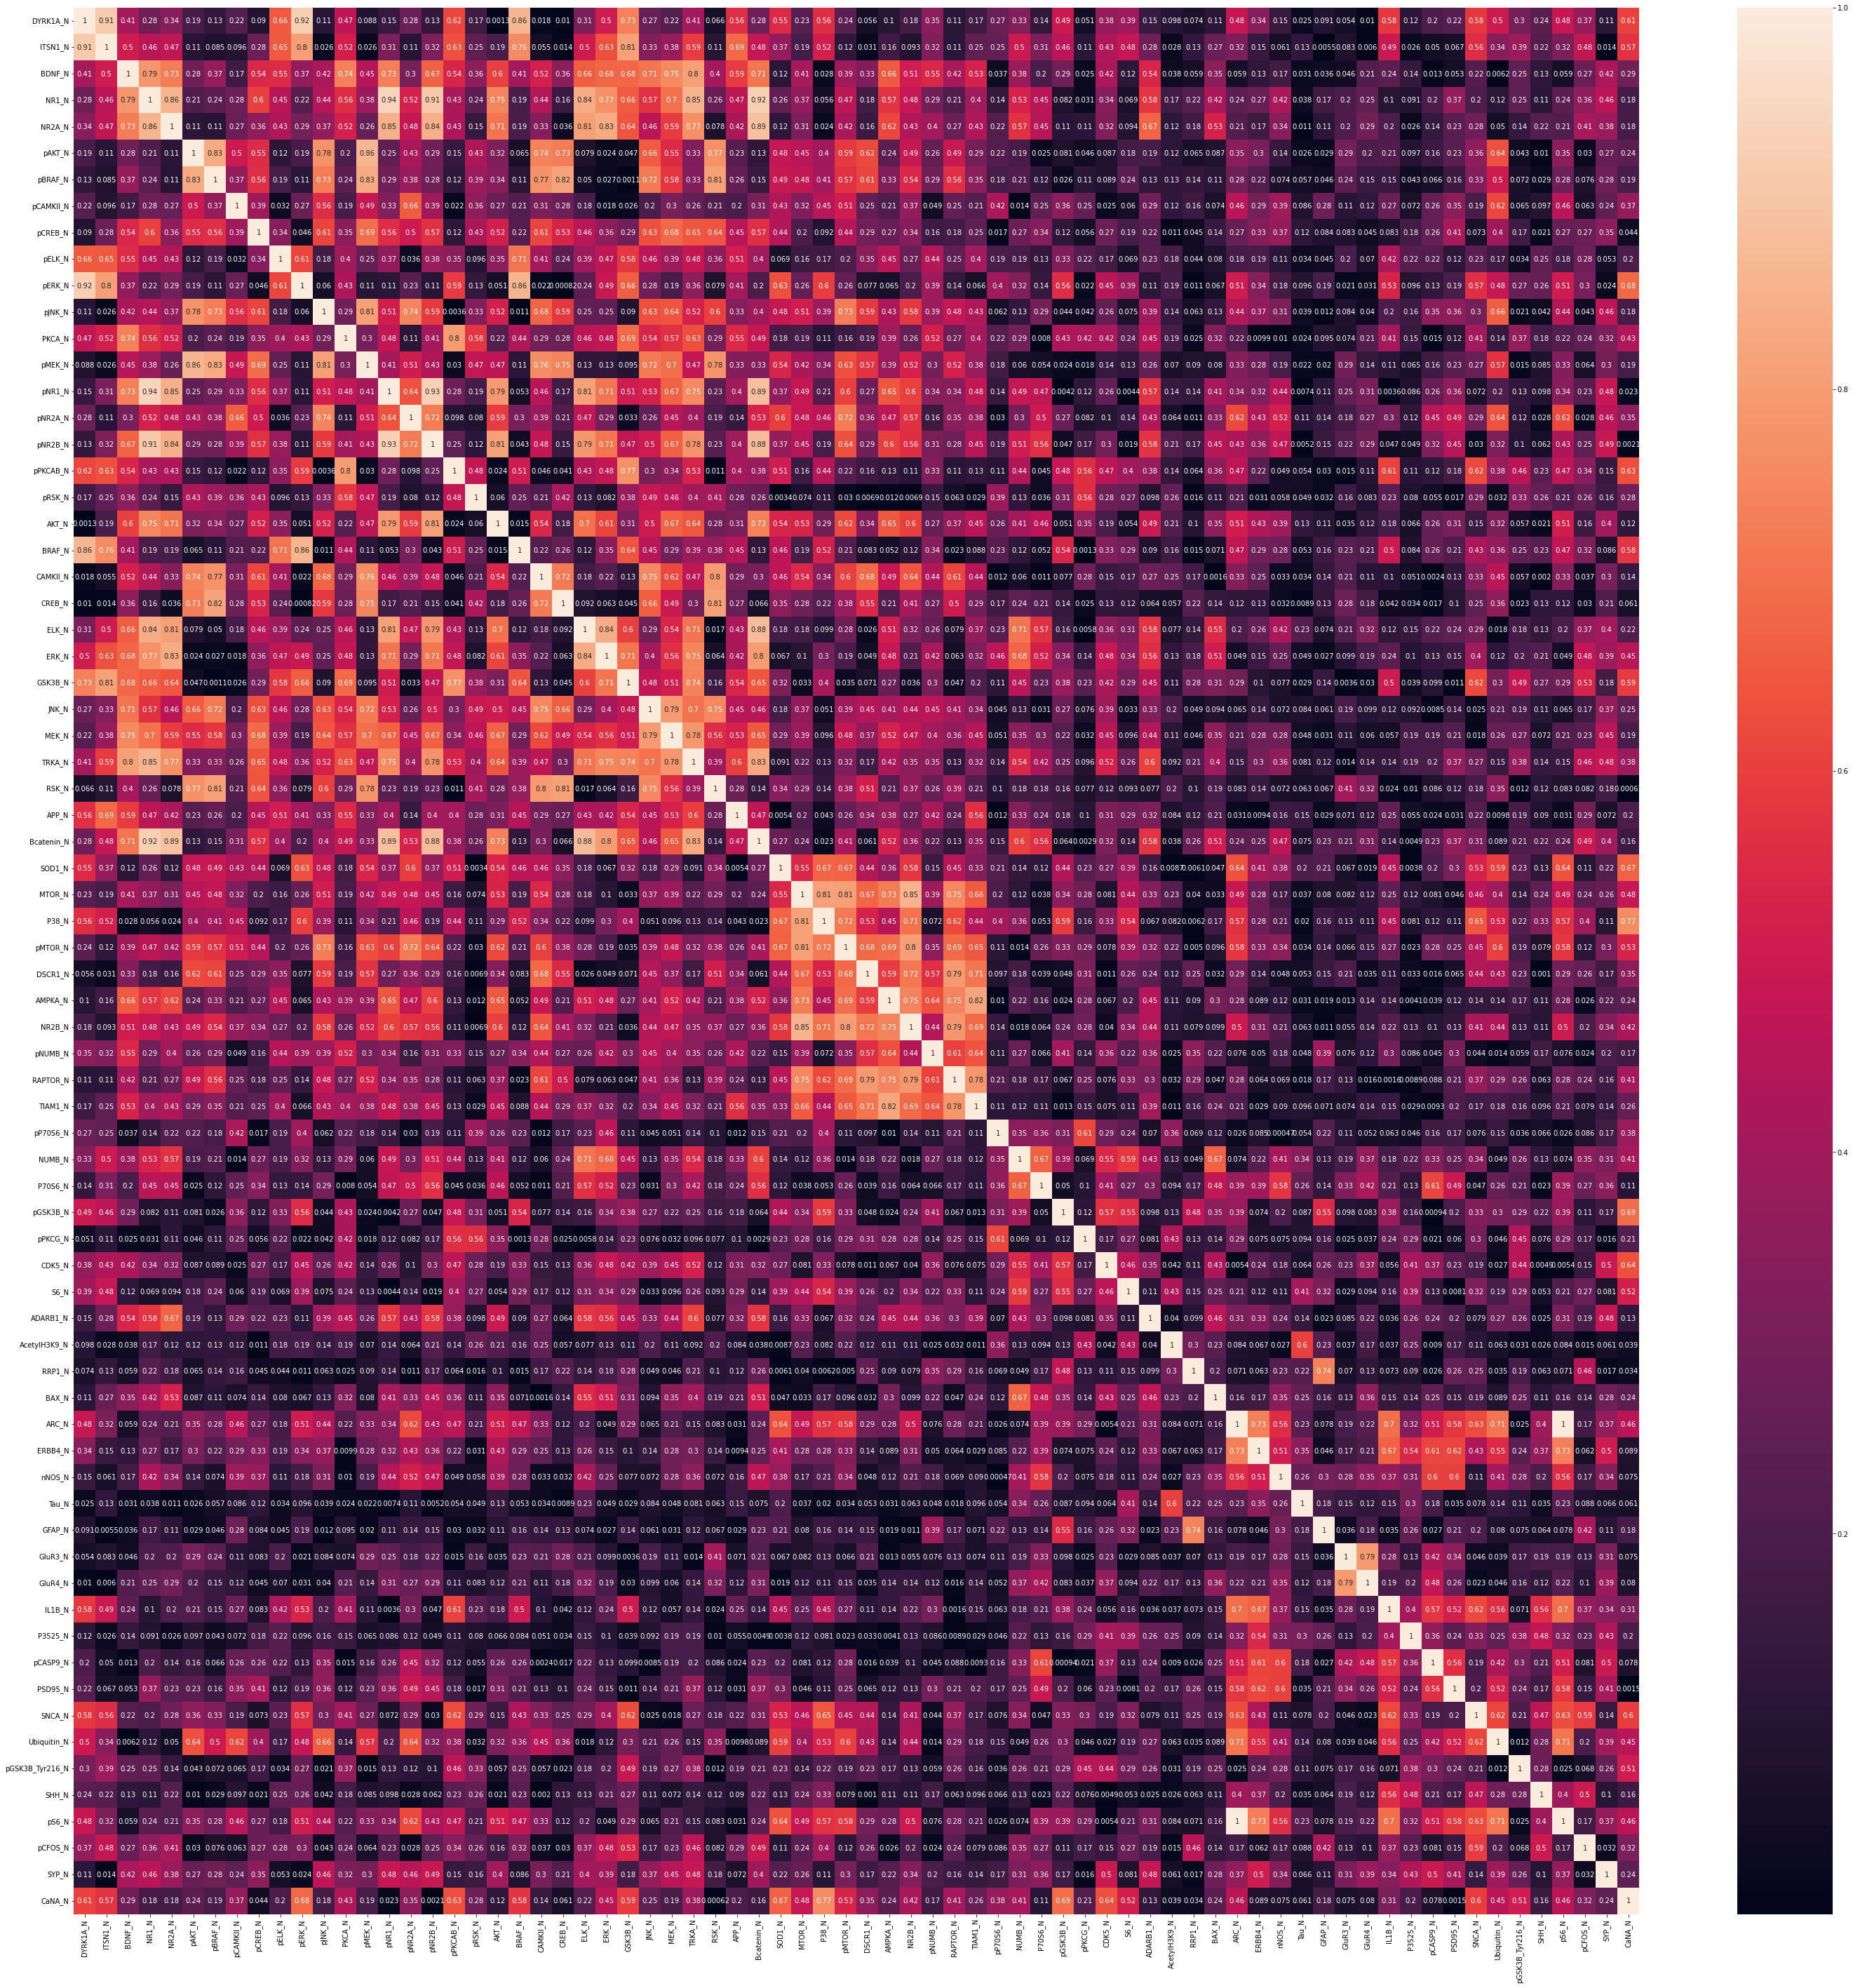

In [ ]:
# We observe the correlation heat map
data_train_input = pd.DataFrame(data_train_input)
corrMatrix = data_train_input.corr(method='spearman')# Using spearman for nonlinear
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(abs(corrMatrix), annot=True)
plt.show()

In [ ]:
def corr_df(x, corr_val):
    '''
    Obj: Finds the strongly correlated features.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''

    # Take the upper triangular part of the correlation matrix and 
    # drop the columns of correlated variables whose correlation is above a threshold

    # Create correlation matrix
    corrMatrix = x.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))
    # Find index of feature columns with correlation greater than 0.85
    to_drop = [column for column in upper.columns if any(upper[column] > corr_val)]

    return x.drop(x[to_drop], axis=1), to_drop

In [ ]:
data_train_input, to_drop = corr_df(data_train_input, 0.80)
data_test_input = data_test_input.drop(data_test_input[to_drop], axis=1)
data_train_input

,DYRK1A_N,BDNF_N,pAKT_N,pCAMKII_N,pCREB_N,pJNK_N,PKCA_N,pNR2A_N,pRSK_N,AKT_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pCFOS_N,SYP_N,CaNA_N
0,0.503644,0.430175,0.218830,2.373744,0.232224,0.306382,0.402698,0.605673,0.441599,0.859366,...,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.108336,0.427099,1.675652
1,0.514617,0.411770,0.211636,2.292150,0.226972,0.299051,0.385987,0.587559,0.445222,0.834659,...,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.104315,0.441581,1.743610
2,0.509183,0.418309,0.209011,2.283337,0.230247,0.291276,0.381002,0.602449,0.467668,0.814329,...,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.106219,0.435777,1.926427
3,0.442107,0.358626,0.222886,2.152301,0.207004,0.296729,0.377087,0.520293,0.477671,0.727705,...,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.111262,0.391691,1.700563
4,0.434940,0.358802,0.213106,2.134014,0.192158,0.286961,0.363502,0.507990,0.483416,0.687794,...,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.110694,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,0.234529,3.208804,0.221809,0.317851,0.306417,0.666857,0.499929,0.642704,...,0.311337,1.622850,2.236925,0.149263,1.136276,1.001404,0.216128,0.115567,0.441207,1.474465
758,0.401739,0.321841,0.236546,3.384350,0.231899,0.329786,0.323939,0.709489,0.536801,0.678459,...,0.315762,1.657617,2.274556,0.154894,1.154191,1.043402,0.209717,0.108944,0.444913,1.516605
759,0.382182,0.318545,0.259636,3.006364,0.223455,0.354545,0.324182,0.657636,0.510545,0.635636,...,0.308615,1.504094,2.107139,0.153154,1.195479,0.948795,0.211279,0.114635,0.422789,1.433514
760,0.365622,0.297992,0.245333,2.948221,0.217506,0.325819,0.310497,0.649172,0.490490,0.607080,...,0.327140,1.568203,2.212959,0.154868,1.213194,0.995884,0.197436,0.120649,0.459901,1.543274


Therefore we have a binary and quaternary output, which are not populated by NaN values. Since, we cannot perform mathematical operations on string, we create a rule list for replacement of the strings with integers and replace these strings in the output variables. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
from sklearn.preprocessing import LabelEncoder
le0 = LabelEncoder() ### Object which encapsulates the labelling-> Genotype.
le1 = LabelEncoder() ### Object which encapsulates the labelling-> Treatment Behaviour.
le0.fit(data_train_output.iloc[:,0]) ### Intializing the Object -> Genotype
le1.fit(data_train_output.iloc[:,1]) ### Initializing the Object -> Treatment Behaviours
data_train_output.iloc[:, 0] = le0.transform(data_train_output.iloc[:,0]) ### Converts categories to integers.-> Genotype
data_train_output.iloc[:, 1] = le1.transform(data_train_output.iloc[:,1]) ### Converts categories to integers.->Treatment Beahaviour
target_names_bin = list(le0.classes_)
target_names_multi = list(le1.classes_)

### Added 3 21  : Same encoding for test data output 
le0.fit(data_test_output.iloc[:,0]) ### Intializing the Object -> Genotype
le1.fit(data_test_output.iloc[:,1]) ### Initializing the Object -> Treatment Behaviours
data_test_output.iloc[:, 0] = le0.transform(data_test_output.iloc[:,0]) ### Converts categories to integers.-> Genotype
data_test_output.iloc[:, 1] = le1.transform(data_test_output.iloc[:,1]) ### Converts to integers->TreatmentBeahaviour

#### end Added 

# display(data_train_output)
print(target_names_bin)

['Control', 'Ts65Dn']


In [ ]:
print(target_names_multi)

['Memantine_C/S', 'Memantine_S/C', 'Saline_C/S', 'Saline_S/C']


## Checking Class Balance
Let us now take a look at the distribution of categories (Class Balance)

Genotype
The class sizes are about 15% on either side of the mean, which is quite significant. So we consider these classes to be imbalanced. And we use the f1_weighted metric for evaluating the validation and test score. 
We have based our choices on two articles by Bex T.  
1. https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd
2. https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362

[435 327] 0.14173228346456693


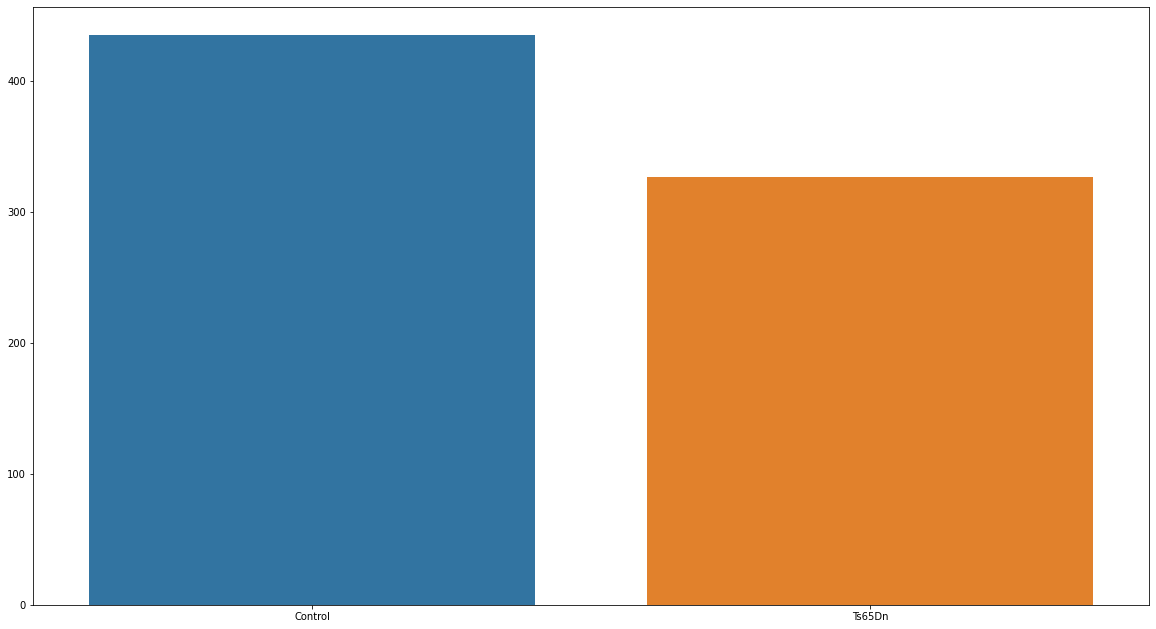

In [ ]:
plot_y = data_train_output.iloc[:,0].values ### Values of Output. 
plot_x, plot_y = np.unique(plot_y, return_counts=True) ### Returns (Elements, Frequencies)
print(plot_y, np.std(plot_y)/np.mean(plot_y))
sns.barplot(x=le0.inverse_transform(plot_x), y=plot_y) ### We get the corresponding labels from LabelEncoding Objects.
plt.show()

Treatment_Behaviour
As we can see the classes are severely imbalanced. So we use f1_weighted here as well. 

[225 225 180 132] 0.201826860125611


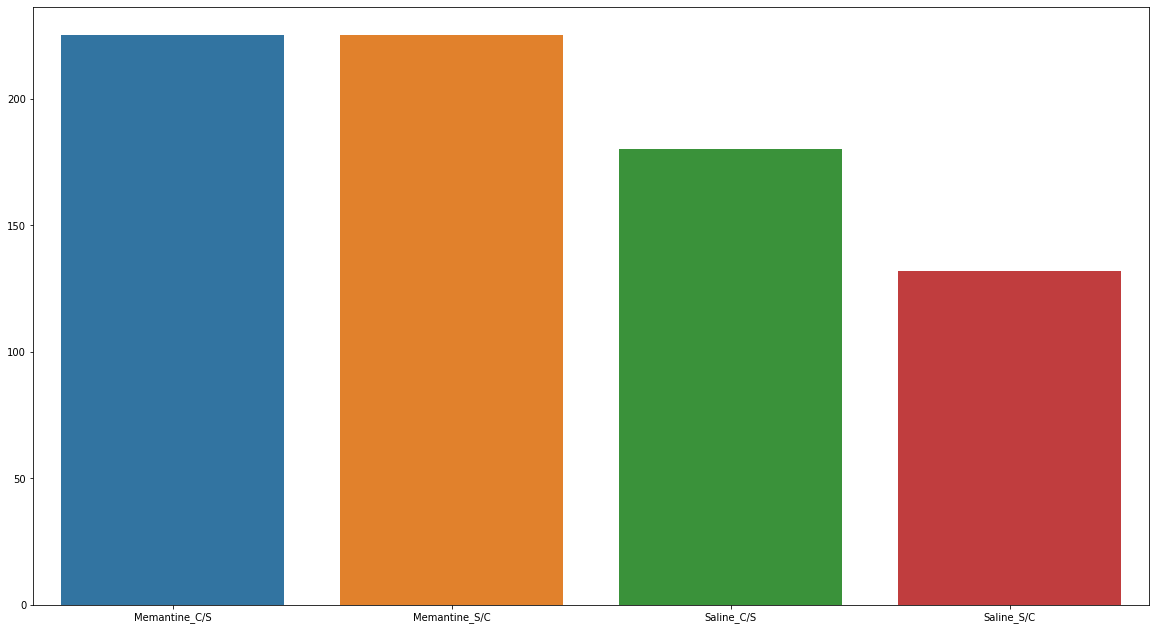

In [ ]:
plot_y = data_train_output.iloc[:,1].values ### Values of Output. 
plot_x, plot_y = np.unique(plot_y, return_counts=True) ### Returns (Elements, Frequencies)
print(plot_y, np.std(plot_y)/np.mean(plot_y))
sns.barplot(x=le1.inverse_transform(plot_x), y=plot_y) ### We get the corresponding labels from LabelEncoding Objects.
plt.show()

We now proceed to feature selection. Let us start by taking a look at the correlation between features and the output and the correlation the features have with themselves. Note the following:  
Before we proceed to feature selection, note that since our output is categorical, we need to choose an appropriate choice for correlation function, since pearson and spearman correlations are applicable only for continuous variables(https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365). If the output is binary (that is dichotomous), then we use the Point-biserial correlation coefficient (https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient) to evaluate the feature-output correlation. Otherwise we use the anova-f statistic as a measure of feature-output correlation for output with more than two classes. For consistency, we use pearson correlation for feature-feature correlation, when we are dealing with the boolean output variable "Genotype" and f-anova correlation when we are dealing with the quaternary variable "Treatment_Behaviour"

In [ ]:
import sklearn.feature_selection

### Correlation between input and output
def correlation_categorical_continuous(y, X, y_bool): ### y_bool-> Is y a binary category?
    if y_bool: ### If output is binary
        return scipy.stats.pointbiserialr(y, X)[0]
    else: ### Otherwise
        return sklearn.feature_selection.f_classif(X.reshape(-1,1), y)[0] ## Anova-f correlation.

### Correlation between input and input.
def correlation_continuous_continuous(x1, x2, y_bool):
    if y_bool: ### To ensure we are using the same metric in feature-output and feature-feature calculation.
        return scipy.stats.pearsonr(x1, x2)[0]
    else:
        return scipy.stats.f_oneway(x1, x2)[0]
# correlation_categorical_continuous(data_y[:,0],data_x[:,0])

We use the following filter method for Feature Selection:
We implement here the Correlation based feature selection method (https://en.wikipedia.org/wiki/Feature_selection) proposed by Mark A. Hall, which can be roughly understood as follows: Our goal in feature selection is to:  
1. We have to choose those features which have maximum correlation with output
2. We have to choose those features which have minimum correlation between themselves

The above method tries to do both by finding an optimal subset which maximises the following(based on https://www.cs.waikato.ac.nz/~mhall/thesis.pdf):
$$\mathrm{CFS} = \max_{S_k}
\left[\frac{r_{c f_1}+r_{c f_2}+\cdots+r_{c f_k}}
{\sqrt{k+2(r_{f_1 f_2}+\cdots+r_{f_i f_j}+ \cdots
+ r_{f_k f_{k-1} })}}\right].$$
Where $r_{c f_{i}}$ is the correlation between the output and feature $i$ and $r_{f_{i} f_{j}}$ is the correlation between features $i$ and $j$. We base our code here on the implementation from https://johfischer.com/2021/08/06/correlation-based-feature-selection-in-python-from-scratch/#:~:text=Including%20feature%20selection%20methods%20as,predictive%20power%20by%20reducing%20noise. It is fairly similar to forward feature selection. Note that, according to Hall this method shows poorer results when interactions between variables is significant. But in almost all other cases, the performance of the model is improved and the computational time is drastically reduced.  
Since, this method drastically reduces the number of features included in computation (but still shows greater or performance equal to the scenario of including all features), we use it find out the two best models in classification and then use RFECV as a wrapper method for feature selection before prediction on test data set.

To work with any general method for feature selection (filter method), we implement here an Sklearn-Pipeline like function, which takes as inputs, a feature selection method, the feature matrix, the ML model, the hyperparameters that are to be tuned and the methods of scoring and returns the ML model (sklearn object). 

In [ ]:
from sklearn.model_selection import GridSearchCV ### To pick out the best hyperparameter.
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import normalize
def custom_pipeline(X, y, ML_model, hyperparameters, main_scorer,  feature_selection=None): # This was not used
    """
    Inputs are:
    X: Matrix of features : (n_samples, n_features)
    y: Column of classification targets: (n_samples,)
    feature_selection: A function which takes inputs X, y and whether y is boolean or not and returns a modified array X with the "correct" features.
    ML_model: Machine Learning Model to be used. An Sklearn object.
    hyperparameters: A dictionary of hyperparameters along with the grids over which they are to be tuned. 
    main_scorer: The primary score/metric to be used for finding the best parameters. 
    # scoring_list: A list of scoring methods.

    Output is: 
    An ML_model trained through five-fold cross validation and tuned using GridSearchCV. 
    """

    y_bool = len(y.unique())==2 ### Is the target variable boolean?

    ### Sklearn/Scikit works best with numpy arrays. 

    X_array = np.array(X.values, dtype=np.float64) ### Features are all floating points.

    X_array = normalize(X_array, norm='l2', axis=0) ### Normalizing the input features.

    y_array = np.array(y.values, dtype=np.int64) ### Features are all integers. 

    if feature_selection == None: 
      X_array_select = X_array
    else:
      X_array_select = feature_selection(X_array, y_array, y_bool)[1] ### Feature matrix after feature selection.

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    grid = GridSearchCV(ML_model, hyperparameters, cv=cv, scoring=main_scorer, n_jobs=-1, error_score='raise', verbose=3) ### We search the grid for best hyperparameters.

    grid.fit(X_array_select, y_array) ### Training the model. 

    print(main_scorer+" is: "+str(grid.best_score_)) ### Best Scores. 
    print("Tuned Hyperparameters are:", grid.best_params_)

    return grid ### Trained ML model with best hyperparameters chosen using main_scorer.

## Feature Selection Algorithms

CFS Algorithm:

Since, finding the optimal subset directly means trying $2^{n}-1$ permutations, we instead implement here the method suggested by Hall in his thesis: Best First Search Method using a Priority Queue (note that in Python, Priority Queues are sorted in ascending order).

In [ ]:
import queue
def CFS_feature_selection(X_array, y_array, y_bool):
    num_features = np.shape(X_array)[1] ### Total number of features.
    ### Feature-Output Correlation. Loop Comprehension used.
    fc = np.abs(np.array([correlation_categorical_continuous(y_array, X_array[:, i], y_bool) for i in range(num_features)]))

    ### To prevent unnecessary overhead, we use memoization. The idea is to store feature-feature correlation in a dictionary, and fetch if needed.    
    ff = {}

    def merit_cfs(subset):### Given a subset(list of columns), we calculate the CFS merit.
        k = np.shape(subset)[0] ### Cardinality of subset. 
#         print(fc[subset])
        subset_fc = np.sum(fc[subset]) ### Feature-Output Correlation Sum of Subset.
        
        ### We have to calculate correlation of fifj, i>j.
        subset_ff = 0.0 ### Sum of correlations.
        for i in set(subset): ### Features in current subset.
            for j in set(subset): ### Features in current subset.
                if i>j: ### To prevent double counting.
                    if (i,j) not in ff: ### If not in dictionary, then evaluate
                        ff[(i,j)] = correlation_continuous_continuous(X_array[:,i],X_array[:,j], y_bool) ## Adding calculated value to dict.
                        subset_ff = subset_ff+ff[(i,j)] ### Adding the feature-feature correlation.
                    else: ### If in dictionary, simply fetch value.
                        subset_ff = subset_ff+ff[(i,j)] ### Adding the feature-feature correlation.
                else:
                    pass ### To prevent overcounting.
        return subset_fc/np.sqrt(k+2*subset_ff)
    
    optimal_subset = [np.argmax(fc)] ### Final reported subset. 
#     print(optimal_subset)
    current_subset = [np.argmax(fc)] ### Working subset in algorithm. 
    ### Initialized by feature with maximum correlation.
    
    optimal_subset_found = False
    ### Boolen variable for loop termination. Is optimal subset found??
    
    current_merit = fc[np.argmax(fc)] ### Merit of working subset. 
    prev_merit = fc[np.argmax(fc)] ### Working of the subset with maximum merit in the previous iteration.
    
    total_iter = set(range(num_features)) ### Universal containing all features. 
    current_iter = set(current_subset) ### Features containted in working subset. 
    
    num_backtrack = 0 ### Iterator to keep track of number of "backtracks", or nodes moved.
    max_backtrack = 10 ### Maximum number of backtracks for loop termination. Otherwise too much resources.
    
    pqueue = queue.PriorityQueue() ### Priority Queue
    pqueue.put((-current_merit, current_subset)) ### We add (-merit, subset) to queue.
    ### Since Priority Queues in Python are in ascending order, and we need the subset with maximal merit at
    ### each step, we use a simple trick. x->-x, ascending becomes descending. 
    
    while not(optimal_subset_found) and not(pqueue.empty()): ### loop termination, optimal subset found or
                                                            ### Priority Queue is empty.
#         print(pqueue.empty(), optimal_subset_found)
        current_merit, current_subset = pqueue.get() ### Get the set with maximum merit. 
        current_merit = -current_merit ### Our trick. 
#         print(pqueue.qsize())
        current_iter = set(current_subset) ### All the features in our subset. 
#         print(current_iter)
#         print(current_merit, current_subset, pqueue.qsize())
        
        if prev_merit > current_merit: 
            ### If merit has decreased from previous iteration, then our subset is not optimal.
            num_backtrack=num_backtrack+1
        else:
            prev_merit = current_merit ### Otherwise, subset can be optimal.
            optimal_subset = current_subset
#             print(optimal_subset)
            
        if num_backtrack==max_backtrack: ### Implemented to prevent over resource consumption. 2^n combinations!!
            optimal_subset_found=True ### Loop termination. 
        else:
            for i in total_iter-current_iter: ### Features "not" in the working subset.
                pqueue.put((-merit_cfs(current_subset+[i]), current_subset+[i])) ### Add to queue, 
                                                                                ### which will sort them in O(log n) time.
    # print(optimal_subset)
    return np.sort(np.array(optimal_subset)), X_array[:,np.sort(np.array(optimal_subset))] ### Optimal subset which has max merit.
    ### We return the subset indices as well, since we need to identify these proteins when determing feature importance.
# CFS_feature_selection(data_train_input.values, data_train_output.iloc[:,0].values, True)

## Genotype Prediction

## Elastic net Logistic Regression

In [ ]:
### Prepare Test Data
#############
#  Prepare the test data for prediction for the rfe columns and output
#############
X_test_array = np.array(data_test_input.values, dtype=np.float64) ### Features are all floating points.
X_test_array = normalize(X_test_array, norm='l2', axis=0) ### Normalizing the input features.
y_test_array = np.array(data_test_output.iloc[:,0].values, dtype=np.int64) ### Test Output

In [ ]:
### TEst data prepartion for multi classification
y_test_array_multi = np.array(data_test_output.iloc[:,1].values, dtype=np.int64) ### Test Output

In [ ]:
###  Binary Classifier for Genotype
from sklearn.linear_model import LogisticRegression

model_enet = LogisticRegression(  max_iter=20000 )

model = LogisticRegression( random_state=0)### Model for Learning, random_state seeded for reproducibility.
hyperparameters ={ 'penalty':['elasticnet'], 'solver':['saga'], 'l1_ratio': [ 0.25, 0.5], 'C': [400, 100, 10, 1, 0.1]} ### Grid of hyperparameters to search in. 
main_scorer = 'f1_weighted'
# scoring_list = ['f1_weighted', 'accuracy','roc_auc']
enet_model = custom_pipeline(data_train_input, data_train_output.iloc[:,0], model, hyperparameters, main_scorer) ### Embedded method.

Fitting 15 folds for each of 10 candidates, totalling 150 fits
f1_weighted is: 0.8307931714379742
Tuned Hyperparameters are: {'C': 400, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
from sklearn.metrics import classification_report
y_pred = enet_model.predict(X_test_array)
df_enet_model_bin_res = pd.DataFrame( classification_report(y_test_array, y_pred, digits=3, target_names = target_names_bin, output_dict = True )   ).transpose()

print (' Binary Classification Report for GenoType using Logistic Regression Elastic Net')
print(classification_report(y_test_array, y_pred, digits=3, target_names = target_names_bin))

 Binary Classification Report for GenoType using Logistic Regression Elastic Net
              precision    recall  f1-score   support

     Control      1.000     0.074     0.138       135
      Ts65Dn      0.419     1.000     0.590        90

    accuracy                          0.444       225
   macro avg      0.709     0.537     0.364       225
weighted avg      0.767     0.444     0.319       225



In [ ]:
### Multiclass Classification for Treatment_Behavior using Elasticnet

In [ ]:
###  Multi Classifier for Treatment_Behavior
from sklearn.linear_model import LogisticRegression

model_enet_multi = LogisticRegression( class_weight = 'balanced',  max_iter=20000 )

model = LogisticRegression( random_state=0)### Model for Learning, random_state seeded for reproducibility.
hyperparameters ={ 'penalty':['elasticnet'], 'solver':['saga'], 'l1_ratio': [ 0.25, 0.5], 'C': [400, 100, 10, 1, 0.1]} ### Grid of hyperparameters to search in. 
main_scorer = 'f1_weighted'
# scoring_list = ['f1_weighted', 'accuracy','roc_auc']
enet_model_multi = custom_pipeline(data_train_input, data_train_output.iloc[:,1], model, hyperparameters, main_scorer) ### Embedded method.

Fitting 15 folds for each of 10 candidates, totalling 150 fits
f1_weighted is: 0.8998192371477527
Tuned Hyperparameters are: {'C': 400, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
y_pred = enet_model_multi.predict(X_test_array)
df_enet_model_multi_res = pd.DataFrame( classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi, output_dict = True )   ).transpose()

print (' Multi Classification Report for Treatment_Behavior using Logistic Regression Elastic Net')
print(classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi))

 Multi Classification Report for Treatment_Behavior using Logistic Regression Elastic Net
               precision    recall  f1-score   support

Memantine_C/S      0.784     0.667     0.721        60
Memantine_S/C      0.586     0.967     0.730        60
   Saline_C/S      0.667     0.567     0.613        60
   Saline_S/C      0.917     0.489     0.638        45

     accuracy                          0.684       225
    macro avg      0.738     0.672     0.675       225
 weighted avg      0.726     0.684     0.678       225



# Feature Importance
For linear methods (kernel or otherwise), the importance of a feature can be thought of as the weight associated with in the linear model. https://machinelearningmastery.com/calculate-feature-importance-with-python/

For a decision tree (Random Forest Method), the importance is decided on the basis of "change" in impurity or whatever classifier is used. https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

We use the feature classification function, to get the labels of the features used in the model and then we plot the values of the weights with the labels to understand the relative importance of proteins in classification.


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


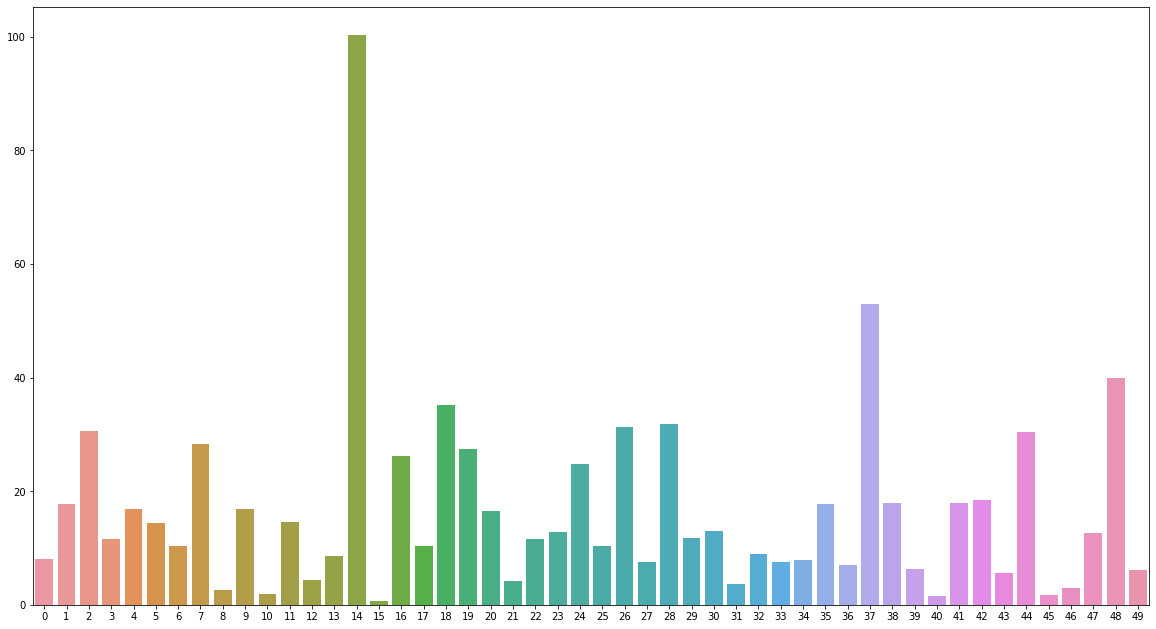

In [ ]:
def feature_importance_linear(ML_model, X, y, y_bool, feature_selection): ### ML_model is the trained model from grid search. 

    X_array = np.array(X.values, dtype=np.float64) ### Features are all floating points.

    X_array = normalize(X_array, norm='l2', axis=0) ### Normalizing the input features.

    y_array = np.array(y.values, dtype=np.int64) ### Features are all integers.

    used_features = list(feature_selection(X_array, y_array, y_bool)[0]) ### Features used 
    print(used_features)

    # used_labels = X.columns[used_features] Using strings clutters the x-axis, making it unreadable
    # print(used_labels, X.iloc[:,0])

    weights = np.abs(ML_model.best_estimator_.coef_[0]) ### Coeffecient Matrix.

    sns.barplot(x=used_features, y=weights)
    plt.show()
    return
feature_importance_linear(enet_model, data_train_input, data_train_output.iloc[:,0], True, lambda x,y,z: (range(np.shape(x)[1]),x))

## Neural Network with single ReLU Hidden Layer and Softmax Output

We choose parameters on the basis of https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='relu', solver='adam', random_state=0, max_iter = 1500) ### Since our dataset is small, we use lbfgs solver. Default output is softmax.
hyperparameters = {'hidden_layer_sizes': [100, 110], 'alpha': [0.01, 0.001]}
main_scorer = 'f1_weighted'
neural_network_model = custom_pipeline(data_train_input, data_train_output.iloc[:,0], model, hyperparameters, main_scorer)

Fitting 15 folds for each of 4 candidates, totalling 60 fits
f1_weighted is: 0.8637208370829943
Tuned Hyperparameters are: {'alpha': 0.001, 'hidden_layer_sizes': 110}


In [ ]:
y_pred = neural_network_model.predict(X_test_array)
df_mlp_model_bin_res = pd.DataFrame( classification_report(y_test_array, y_pred, digits=3, target_names = target_names_bin, output_dict = True )   ).transpose()

print (' Binary Classification Report for GenoType using Neural Network Model ')
print(classification_report(y_test_array, y_pred, digits=3, target_names = target_names_bin))

 Binary Classification Report for GenoType using Neural Network Model 
              precision    recall  f1-score   support

     Control      1.000     0.030     0.058       135
      Ts65Dn      0.407     1.000     0.579        90

    accuracy                          0.418       225
   macro avg      0.704     0.515     0.318       225
weighted avg      0.763     0.418     0.266       225



In [ ]:
model = MLPClassifier(activation='relu', solver='lbfgs', random_state=0, max_iter = 2000) ### Since our dataset is small, we use lbfgs solver. Default output is softmax.
hyperparameters = {'hidden_layer_sizes': [100, 110], 'alpha': [0.01, 0.001]}
main_scorer = 'f1_weighted'
neural_network_model_multi = custom_pipeline(data_train_input, data_train_output.iloc[:,1], model, hyperparameters, main_scorer)

Fitting 15 folds for each of 4 candidates, totalling 60 fits
f1_weighted is: 0.9916852925682197
Tuned Hyperparameters are: {'alpha': 0.001, 'hidden_layer_sizes': 110}


In [ ]:
y_pred = neural_network_model_multi.predict(X_test_array)
df_mlp_model_multi_res = pd.DataFrame( classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi, output_dict = True )   ).transpose()

print (' Multi Classification Report for Treatment_Behavior using Neural Network Model ')
print(classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi))

 Multi Classification Report for Treatment_Behavior using Neural Network Model 
               precision    recall  f1-score   support

Memantine_C/S      0.606     1.000     0.755        60
Memantine_S/C      0.625     1.000     0.769        60
   Saline_C/S      1.000     0.167     0.286        60
   Saline_S/C      1.000     0.444     0.615        45

     accuracy                          0.667       225
    macro avg      0.808     0.653     0.606       225
 weighted avg      0.795     0.667     0.606       225



Feature Importance in Neural Networks is different. We study the importance of a feature by randomising a feature and then looking at the change in score.
https://christophm.github.io/interpretable-ml-book/feature-importance.html
This is equivalent to simply looking at the prediction score on test data for each feature after randomising it.

In [ ]:
''''
<<<<   TBD  >>>
from sklearn.metrics import f1_score ### For calculating prediction score.

X_array = np.array(data_train_input.values, dtype=np.float64) ### Features are all floating points.

X_array = normalize(X_array, norm='l2', axis=0) ### Normalizing the input features.

y_array = np.array(data_train_output.iloc[:,1].values, dtype=np.int64) ### Features are all integers.

used_features, X_array_select = CFS_feature_selection(X_array, y_array, True) ### Boolean variable.

used_features = np.array(used_features,  dtype=np.int64) ### We are converting it into integers, just to be sure.
importance = [] ### Array to store relative importance.

for each in range(len(used_features)): ### Iterating over the columns of X_array_select.
    X_array_select_randomized = X_array_select ### We have to copy the feature array every time, since we are randomizing a single feature everytime.
    X_array_select_randomized[:,each] = np.random.randn(np.shape(X_array_select)[0]) ### Create n random samples and replace the column each.
    y_pred = neural_network_model_multi.predict(X_array_select_randomized)
    importance.append(-f1_score(data_train_output.iloc[:,1], y_pred)) ### True Output, Predicted Output. Since reduction is importance.

sns.barplot(x=used_features, y=importance)
plt.show()
### Shorter has greater importance.

'''

"'\n<<<<   TBD  >>>\nfrom sklearn.metrics import f1_score ### For calculating prediction score.\n\nX_array = np.array(data_train_input.values, dtype=np.float64) ### Features are all floating points.\n\nX_array = normalize(X_array, norm='l2', axis=0) ### Normalizing the input features.\n\ny_array = np.array(data_train_output.iloc[:,1].values, dtype=np.int64) ### Features are all integers.\n\nused_features, X_array_select = CFS_feature_selection(X_array, y_array, True) ### Boolean variable.\n\nused_features = np.array(used_features,  dtype=np.int64) ### We are converting it into integers, just to be sure.\nimportance = [] ### Array to store relative importance.\n\nfor each in range(len(used_features)): ### Iterating over the columns of X_array_select.\n    X_array_select_randomized = X_array_select ### We have to copy the feature array every time, since we are randomizing a single feature everytime.\n    X_array_select_randomized[:,each] = np.random.randn(np.shape(X_array_select)[0]) ###

## Support Vector Machine
We choose our parameters on the basis of https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [ ]:
###  Binary Classification
from sklearn.svm import SVC ## Classification.
model = SVC(random_state=0, class_weight='balanced')
hyperparameters = {'kernel':['linear', 'sigmoid'], 'C': [200, 100, 10]} ## C is akin to slack penalty.
main_scorer = 'f1_weighted'
svm_model = custom_pipeline(data_train_input, data_train_output.iloc[:,0], model, hyperparameters, main_scorer)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
f1_weighted is: 0.9092223289008391
Tuned Hyperparameters are: {'C': 200, 'kernel': 'linear'}


We observed that rbf kernel is overfitting the data creating worse target predictions

In [ ]:
y_pred = svm_model.predict(X_test_array)
df_svm_model_bin_res = pd.DataFrame(classification_report(y_test_array, y_pred, digits=3, target_names = target_names_bin, output_dict = True )).transpose()

print (' Binary Classification Report for GenoType using SVM Model ')
print(classification_report(y_test_array, y_pred, digits=3, target_names = target_names_bin))

 Binary Classification Report for GenoType using SVM Model 
              precision    recall  f1-score   support

     Control      1.000     0.089     0.163       135
      Ts65Dn      0.423     1.000     0.594        90

    accuracy                          0.453       225
   macro avg      0.711     0.544     0.379       225
weighted avg      0.769     0.453     0.336       225



In [ ]:
###  Multi Classification using SVM 
from sklearn.svm import SVC ## Classification.
model = SVC(random_state=0, class_weight='balanced')
hyperparameters = {'kernel':['linear', 'sigmoid'], 'C': [200, 100, 10]} ## C is akin to slack penalty.
main_scorer = 'f1_weighted'
svm_model_multi = custom_pipeline(data_train_input, data_train_output.iloc[:,1], model, hyperparameters, main_scorer)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
f1_weighted is: 0.9138044959444465
Tuned Hyperparameters are: {'C': 200, 'kernel': 'linear'}


In [ ]:
y_pred = svm_model_multi.predict(X_test_array)
df_svm_model_multi_res = pd.DataFrame( classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi, output_dict = True )   ).transpose()

print (' Multi Classification Report for Treatment_Behavior using SVM Model ')
print(classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi ))

 Multi Classification Report for Treatment_Behavior using SVM Model 
               precision    recall  f1-score   support

Memantine_C/S      0.671     0.950     0.786        60
Memantine_S/C      0.815     0.883     0.848        60
   Saline_C/S      0.914     0.533     0.674        60
   Saline_S/C      0.825     0.733     0.776        45

     accuracy                          0.778       225
    macro avg      0.806     0.775     0.771       225
 weighted avg      0.805     0.778     0.771       225



Calculating weights for SVC is non-trivial, as sklearn uses the dual form of the Loss Function. 

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
hyperparameters = {'n_estimators': [100, 150],'max_depth': [7,9 ]}

main_scorer = 'f1_weighted'
random_forest_model = custom_pipeline(data_train_input, data_train_output.iloc[:,0], model, hyperparameters, main_scorer)

Fitting 15 folds for each of 4 candidates, totalling 60 fits
f1_weighted is: 0.9885857098902499
Tuned Hyperparameters are: {'max_depth': 9, 'n_estimators': 150}


In [ ]:
y_pred = random_forest_model.predict(X_test_array)

print (' Binary Classification Report for GenoType using SVM Model ')
df_rfc_model_bin_res = pd.DataFrame( classification_report(y_test_array, y_pred, digits=3, target_names = target_names_bin, output_dict = True )).transpose()

print(classification_report(y_test_array, y_pred, digits=3, target_names = target_names_bin))

 Binary Classification Report for GenoType using SVM Model 
              precision    recall  f1-score   support

     Control      0.523     0.496     0.510       135
      Ts65Dn      0.299     0.322     0.310        90

    accuracy                          0.427       225
   macro avg      0.411     0.409     0.410       225
weighted avg      0.434     0.427     0.430       225



In [ ]:
model = RandomForestClassifier(random_state=0)
hyperparameters = {'n_estimators': np.linspace(10, 20,  3, dtype=np.int64),'max_depth': [ 5,7 ]}

main_scorer = 'f1_weighted'
random_forest_model_multi = custom_pipeline(data_train_input, data_train_output.iloc[:,1], model, hyperparameters, main_scorer)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
f1_weighted is: 0.9736450527299054
Tuned Hyperparameters are: {'max_depth': 7, 'n_estimators': 20}


In [ ]:
y_pred = random_forest_model_multi.predict(X_test_array)
df_rfc_model_multi_res = pd.DataFrame( classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi, output_dict = True )   ).transpose()

print (' Multi Classification Report for Treatment_Behavior using  Random Forest Model ')
print(classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi ))

 Multi Classification Report for Treatment_Behavior using  Random Forest Model 
               precision    recall  f1-score   support

Memantine_C/S      0.714     0.083     0.149        60
Memantine_S/C      0.316     1.000     0.480        60
   Saline_C/S      0.688     0.183     0.289        60
   Saline_S/C      0.167     0.044     0.070        45

     accuracy                          0.347       225
    macro avg      0.471     0.328     0.247       225
 weighted avg      0.491     0.347     0.259       225



The Random Forest Multi-class model seems to be overfitting very quickly.  This is leading to ver poor predict scores. The training reached 99% in optimization but predict began to drop Memantine based treatment all together.  The parameters were tuned down to detect the missing classes. 

# Feature Importance
For linear methods (kernel or otherwise), the importance of a feature can be thought of as the weight associated with in the linear model. https://machinelearningmastery.com/calculate-feature-importance-with-python/

For a decision tree (Random Forest Method), the importance is decided on the basis of "change" in impurity or whatever classifier is used. https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


In [ ]:
def fi( model_name, model_fi, X ):
  feature_importances = [(X.columns[i], round(value, 5)) for i, value in enumerate(model_fi.feature_importances_)]
  # sorting feature importance based on importance values
  feature_importances.sort(key = lambda x: x[1], reverse=True)
  # plotting feature importances for each fields
  less_imp_columns = [col for col, value in feature_importances[-30:]]
  column_names = [col for col, value in feature_importances]
  data = [value for col, value in feature_importances]

  # assign red color to columns having low feature importance
  colors = ['blue' if col in less_imp_columns else 'green' for col, value in feature_importances]

  fig, ax = plt.subplots(1,1,figsize = (20,5))
  ax.bar(column_names, data,label= 'Feature importance', color=colors, edgecolor='black')
  ax.tick_params(axis='x', rotation=90)
  ax.tick_params(axis='both', labelsize=14)
  ax.set_title(model_name + "Feature Importances", fontsize=17)
  ax.set_ylabel("Values", fontsize=15)

  plt.grid(axis='y')
  plt.legend(prop= {'size':18})
  plt.show()

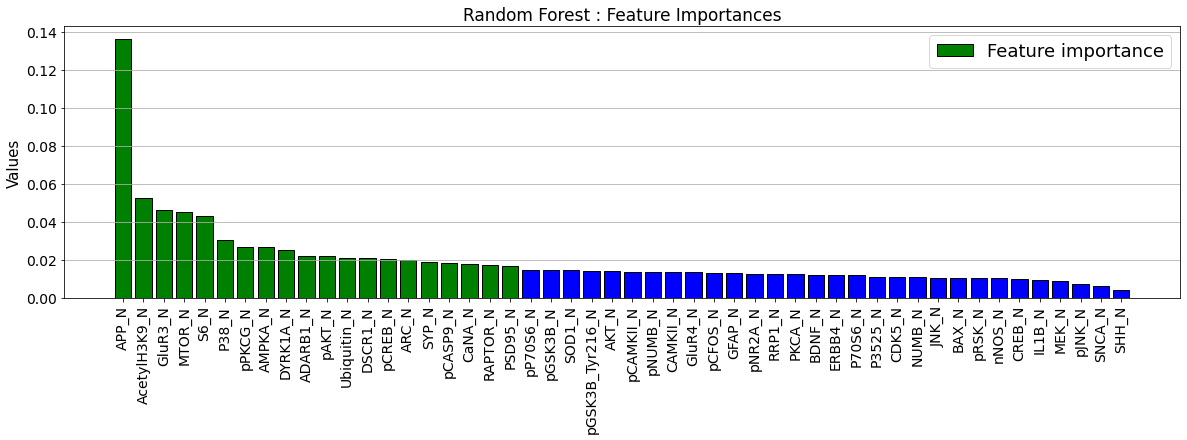

In [ ]:
### Grid Search CV was not giving access to featture_importance value easily
## Trained a base model to study feature importance to RFC 
rfc_model = RandomForestClassifier(random_state=0)
rfc_model.fit( data_train_input, data_train_output.iloc[:,0])
fi("Random Forest : ", rfc_model, data_train_input)

The performance of RFC is very surprising in Multi-class.  However from the featuer distribution it is clear that there is a skewed importance to APP_N protien.  This may create some more imbalances from a data perspective for final prediction results

## 7 Recursive Feature Elimination 

* RFE is a transformer estimators it follows the  fit/transform pattern of Sklearn.  It removes features one at a time based on the weights given by a model of our choice in each iteration. This comes out clear in the graph above

* The most important hyperparameters of RFE are "estimator" and "n_features_to_select". 
* Sklearn provides a RFECV class which implements Recursive Feature Elimination with *cross-validation* and automatically finds the optimal number of features to keep.  

Reference:
https://machinelearningmastery.com/rfe-feature-selection-in-python/

When using RFE, we may be interested to know which features were selected and which were removed.
This can be achieved by reviewing the attributes of the fit RFE object (or fit RFECV object). The “support_” attribute reports true or false as to which features in order of column index were included and the “ranking_” attribute reports the relative ranking of features in the same order.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
def f_rfe(X, y, estimator ):
  """
      Inputs are:
     X: Matrix of features : (n_samples, n_features)
     y: Column of classification targets: (n_samples,)
     estimator: input to RFECV elimination default to Random Classifier

     Output is: 
     X_RFE:  These are the features determined by recursive elimination 
     f : features
  """
  rfecv = RFECV(
      estimator=RandomForestClassifier(),
     min_features_to_select=5,
     step=5,
     n_jobs=-1,
     scoring="r2",
     cv=5,
  )
  rfecv.fit(X, y)
  f = rfecv.get_support(1) #the most important features
  X_RFE = X[X.columns[f]] # final features
  return X_RFE, f


In [ ]:
#  RFE TRAIN BINARY CLASS : Determine the RFE important Features imp_rfe_f and training input
x_rfe_train_bincls, imp_rfe_f  = f_rfe( data_train_input, data_train_output.iloc[:,0], RandomForestClassifier)

## RFE TEST same rfe features to be used with test data 
x_rfe_test_bincls = data_test_input[data_train_input.columns[imp_rfe_f]]
 
#############
#  Prepare the test data for prediction for the rfe columns and output
#############
X_array = np.array(x_rfe_test_bincls.values, dtype=np.float64) ### Features are all floating points.
X_array = normalize(X_array, norm='l2', axis=0) ### Normalizing the input features.
y_array = np.array(data_test_output.iloc[:,0].values, dtype=np.int64) ### Test Output




--------------------------

Using Recursive Feature elimination in the models:
1. Logistic Regression with Elastic Net
2. Random Forrest Classifier
3. MLP
4. SVM 

We will train using similar 5 fold cross validation and predict
as per the test data

----------------------------------

In [ ]:
## CLASSIFIER 1: RFE Columns and Logistic Regression with Elastic Net

In [ ]:

model_enet = LogisticRegression(  max_iter=20000 )

model = LogisticRegression( random_state=0)### Model for Learning, random_state seeded for reproducibility.
hyperparameters ={ 'penalty':['elasticnet'], 'solver':['saga'], 'l1_ratio': [ 0.25, 0.5], 'C': [400, 100, 10, 1, 0.1]} ### Grid of hyperparameters to search in. 
main_scorer = 'f1_weighted'
# scoring_list = ['f1_weighted', 'accuracy','roc_auc']
enet_model_rfe  = custom_pipeline(x_rfe_train_bincls, data_train_output.iloc[:,0], model, hyperparameters, main_scorer) ### Embedded method.

Fitting 15 folds for each of 10 candidates, totalling 150 fits
f1_weighted is: 0.78871525828551
Tuned Hyperparameters are: {'C': 400, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
y_pred = enet_model_rfe.predict(X_array)
df_enet_model_bin_rfe_res = pd.DataFrame( classification_report(y_array, y_pred, digits=3, target_names = target_names_bin, output_dict = True )   ).transpose()

print (' Binary Classification Report for GenoType using Logistic Regression Elastic Net')
print(classification_report(y_array, y_pred, digits=3, target_names = target_names_bin))

 Binary Classification Report for GenoType using Logistic Regression Elastic Net
              precision    recall  f1-score   support

     Control      0.932     0.607     0.735       135
      Ts65Dn      0.613     0.933     0.740        90

    accuracy                          0.738       225
   macro avg      0.772     0.770     0.738       225
weighted avg      0.804     0.738     0.737       225



In [ ]:
### RFE Columns Logistic Regression Elastic net Multiclass Classification

In [ ]:

model_enet_multi = LogisticRegression( class_weight = 'balanced',  max_iter=20000 )

model = LogisticRegression( random_state=0)### Model for Learning, random_state seeded for reproducibility.
hyperparameters ={ 'penalty':['elasticnet'], 'solver':['saga'], 'l1_ratio': [ 0.25, 0.5], 'C': [400, 100, 10, 1, 0.1]} ### Grid of hyperparameters to search in. 
main_scorer = 'f1_weighted'
# scoring_list = ['f1_weighted', 'accuracy','roc_auc']
enet_model_multi_rfe = custom_pipeline(x_rfe_train_bincls, data_train_output.iloc[:,1], model, hyperparameters, main_scorer) ### Embedded method.

Fitting 15 folds for each of 10 candidates, totalling 150 fits
f1_weighted is: 0.6199774629113872
Tuned Hyperparameters are: {'C': 400, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
y_pred = enet_model_multi_rfe.predict(X_array)
df_enet_model_multi_rfe_res = pd.DataFrame( classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi, output_dict = True )   ).transpose()

print (' Multi Classification Report for Treatment_Behavior using Logistic Regression Elastic Net')
print(classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi))

 Multi Classification Report for Treatment_Behavior using Logistic Regression Elastic Net
               precision    recall  f1-score   support

Memantine_C/S      0.611     0.917     0.733        60
Memantine_S/C      0.455     1.000     0.625        60
   Saline_C/S      0.000     0.000     0.000        60
   Saline_S/C      0.000     0.000     0.000        45

     accuracy                          0.511       225
    macro avg      0.266     0.479     0.340       225
 weighted avg      0.284     0.511     0.362       225



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
## CLASSIFIER 2:  RFE Columns and Random Forrest Classifier with Binary Classification 

model = RandomForestClassifier(random_state=0)
hyperparameters_rfc_rfe = {'n_estimators':np.logspace(1,3,3,dtype=np.int64),'max_depth':np.logspace(1,3,3,dtype=np.int64)}
main_scorer = 'f1_weighted'
random_forest_model_rfe = custom_pipeline(x_rfe_train_bincls, data_train_output.iloc[:,0], model, hyperparameters_rfc_rfe, main_scorer)


Fitting 15 folds for each of 9 candidates, totalling 135 fits
f1_weighted is: 0.9688440167592554
Tuned Hyperparameters are: {'max_depth': 100, 'n_estimators': 1000}


In [ ]:

###  Predict using the RFE features ###
y_pred = random_forest_model_rfe.predict(X_array)

print (' Binary Classification Report for GenoType using Recursive feature Elimination RFC')
df_rfc_model_bin_rfe_res = pd.DataFrame( classification_report(y_array, y_pred, digits=3, target_names = target_names_bin, output_dict = True )   ).transpose()

print(classification_report(y_array, y_pred, digits=3, target_names = target_names))

 Binary Classification Report for GenoType using Recursive feature Elimination
              precision    recall  f1-score   support

     Control      0.429     0.133     0.203       135
      Ts65Dn      0.361     0.733     0.484        90

    accuracy                          0.373       225
   macro avg      0.395     0.433     0.343       225
weighted avg      0.401     0.373     0.315       225



In [ ]:
model = RandomForestClassifier(random_state=0)
hyperparameters = {'n_estimators': np.linspace(10, 20,  3, dtype=np.int64),'max_depth': [ 5,7 ]}

main_scorer = 'f1_weighted'
random_forest_model_multi_rfe = custom_pipeline(x_rfe_train_bincls, data_train_output.iloc[:,1], model, hyperparameters, main_scorer)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
f1_weighted is: 0.915499663616146
Tuned Hyperparameters are: {'max_depth': 7, 'n_estimators': 15}


In [ ]:
y_pred = random_forest_model_multi_rfe.predict(X_array)
df_rfc_model_multi_rfe_res = pd.DataFrame( classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi, output_dict = True )   ).transpose()

print (' Multi Classification Report for Treatment_Behavior using  Random Forest Model and Recursive Feature Elimination ')
print(classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi ))

 Multi Classification Report for Treatment_Behavior using  Random Forest Model and Recursive Feature Elimination 
               precision    recall  f1-score   support

Memantine_C/S      0.279     0.833     0.418        60
Memantine_S/C      0.000     0.000     0.000        60
   Saline_C/S      0.154     0.033     0.055        60
   Saline_S/C      0.040     0.022     0.029        45

     accuracy                          0.236       225
    macro avg      0.118     0.222     0.125       225
 weighted avg      0.124     0.236     0.132       225



In [ ]:
### CLASSIFIER 3 : RFE Columns and MLP with Binary Classification 

In [ ]:
# Binary rfe classifier as MLP 
model = MLPClassifier(activation='relu', solver='adam', random_state=0, max_iter = 1500) ### Since our dataset is small, we use lbfgs solver. Default output is softmax.
hyperparameters = {'hidden_layer_sizes': [100, 110], 'alpha': [0.01, 0.001]}
main_scorer = 'f1_weighted'
neural_network_model_rfe = custom_pipeline(x_rfe_train_bincls, data_train_output.iloc[:,0], model, hyperparameters, main_scorer)

Fitting 15 folds for each of 4 candidates, totalling 60 fits
f1_weighted is: 0.763573688301257
Tuned Hyperparameters are: {'alpha': 0.001, 'hidden_layer_sizes': 100}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
y_pred = neural_network_model_rfe.predict(X_array)

print (' Binary Classification Report for GenoType using Neural Network Model and RFE ')
df_mlp_model_bin_rfe_res = pd.DataFrame( classification_report(y_test_array, y_pred, digits=3, target_names = target_names_bin, output_dict = True )   ).transpose()

print(classification_report(y_test_array, y_pred, digits=3, target_names = target_names_bin))

 Binary Classification Report for GenoType using Neural Network Model 
              precision    recall  f1-score   support

     Control      0.949     0.696     0.803       135
      Ts65Dn      0.675     0.944     0.787        90

    accuracy                          0.796       225
   macro avg      0.812     0.820     0.795       225
weighted avg      0.840     0.796     0.797       225



For Binary Classification so far the MLP with recursive feature elimination is giving a very good performance in comparison with other Binary predict classifications.

In [ ]:
model = MLPClassifier(activation='relu', solver='lbfgs', random_state=0, max_iter = 5000) ### Since our dataset is small, we use lbfgs solver. Default output is softmax.
hyperparameters = {'hidden_layer_sizes': [100, 110], 'alpha': [0.01, 0.001]}
main_scorer = 'f1_weighted'
neural_network_model_rfe_multi = custom_pipeline(x_rfe_train_bincls, data_train_output.iloc[:,1], model, hyperparameters, main_scorer)

Fitting 15 folds for each of 4 candidates, totalling 60 fits
f1_weighted is: 0.8930250796704886
Tuned Hyperparameters are: {'alpha': 0.001, 'hidden_layer_sizes': 100}


In [ ]:
y_pred = neural_network_model_rfe_multi.predict(X_array)
df_mlp_model_multi_rfe_res = pd.DataFrame( classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi, output_dict = True )   ).transpose()

print (' Multi Classification Report for Treatment_Behavior using Neural Network Model and RFE ')
print(classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi))

 Multi Classification Report for Treatment_Behavior using Neural Network Modeland RFE 
               precision    recall  f1-score   support

Memantine_C/S      0.538     0.817     0.649        60
Memantine_S/C      0.532     0.967     0.686        60
   Saline_C/S      0.333     0.050     0.087        60
   Saline_S/C      1.000     0.356     0.525        45

     accuracy                          0.560       225
    macro avg      0.601     0.547     0.487       225
 weighted avg      0.574     0.560     0.484       225



In [ ]:
## CLASSIFIER 4  Support Vector Machine and RFE data

In [ ]:
model = SVC(random_state=0, class_weight='balanced')
hyperparameters = {'kernel':['linear', 'sigmoid'], 'C': [200, 100, 10]} ## C is akin to slack penalty.
main_scorer = 'f1_weighted'
svm_model_rfe = custom_pipeline(x_rfe_train_bincls, data_train_output.iloc[:,0], model, hyperparameters, main_scorer)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
f1_weighted is: 0.8520902265955251
Tuned Hyperparameters are: {'C': 200, 'kernel': 'linear'}


In [ ]:
y_pred = svm_model_rfe.predict(X_array)

print (' Binary Classification Report for GenoType using SVM Model with RFE ')
df_svm_model_bin_rfe_res = pd.DataFrame( classification_report(y_test_array, y_pred, digits=3, target_names = target_names_bin, output_dict = True )   ).transpose()

print(classification_report(y_test_array, y_pred, digits=3, target_names = target_names_bin))

 Binary Classification Report for GenoType using SVM Model with RFE 
              precision    recall  f1-score   support

     Control      0.900     0.800     0.847       135
      Ts65Dn      0.743     0.867     0.800        90

    accuracy                          0.827       225
   macro avg      0.821     0.833     0.824       225
weighted avg      0.837     0.827     0.828       225



In [ ]:
# Multi class training with SVM and RFE 
model = SVC(random_state=0, class_weight='balanced')
hyperparameters = {'kernel':['linear', 'sigmoid'], 'C': [200, 100, 10]} ## C is akin to slack penalty.
main_scorer = 'f1_weighted'
svm_model_multi_rfe = custom_pipeline(x_rfe_train_bincls, data_train_output.iloc[:,1], model, hyperparameters, main_scorer)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
f1_weighted is: 0.6186108184582959
Tuned Hyperparameters are: {'C': 200, 'kernel': 'linear'}


In [ ]:
y_pred = svm_model_multi_rfe.predict(X_array)

print (' Multi Classification Report for Treatment_Behavior using SVM Model and RFE ')
df_svm_model_multi_rfe_res = pd.DataFrame( classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi, output_dict = True )   ).transpose()
print(classification_report(y_test_array_multi, y_pred, digits=3, target_names = target_names_multi ))

 Multi Classification Report for Treatment_Behavior using SVM Model and RFE 
               precision    recall  f1-score   support

Memantine_C/S      0.566     0.717     0.632        60
Memantine_S/C      0.465     1.000     0.635        60
   Saline_C/S      0.150     0.050     0.075        60
   Saline_S/C      0.000     0.000     0.000        45

     accuracy                          0.471       225
    macro avg      0.295     0.442     0.336       225
 weighted avg      0.315     0.471     0.358       225



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

SVM Multi-class prediction was lower compared to other models.  Perhaps it needs more features whereas MLP worked better 

---------------------
We were not able to Refactor the code much due to lack of time and each iteration of model running over for quite some time.  To keep things simple for now and readable there is code duplication 

It is interesting to note that whereas the non-RFE models did better in Multi-class classifications.  The RFE models have done better in binary class classification
Score comparisons are listed below

# Summary and Observations

The final test scores are given below along with some observations.

# Scores for Elastic Net Models

In [ ]:
print( "*************************************************************")
print( " The F1 score for Enet Binary model is             :  ", df_enet_model_bin_res.at["accuracy","f1-score"].round(3))
print( " The F1 score for Enet Multiclass model is         :  ", df_enet_model_multi_res.at["accuracy","f1-score"].round(3))
print( " The F1 score for RFE Enet Binary model is         :  ", df_enet_model_bin_rfe_res.at["accuracy","f1-score"].round(3))
print( " The F1 score for RFE Enet Multiclass model is     :  ", df_enet_model_multi_rfe_res.at["accuracy","f1-score"].round(3))
print( "*************************************************************")

*************************************************************
 The F1 score for Enet Binary model is             :   0.444
 The F1 score for Enet Multiclass model is         :   0.684
 The F1 score for RFE Enet Binary model is         :   0.738
 The F1 score for RFE Enet Multiclass model is     :   0.511
*************************************************************


## Scores for Support Vector Machines 

In [ ]:
print( "*************************************************************")
print( " The F1 score for SVM Binary model is             :  ", df_svm_model_bin_res.at["accuracy","f1-score"].round(3))
print( " The F1 score for SVM Multiclass model is         :  ", df_svm_model_multi_res.at["accuracy","f1-score"].round(3))
print( " The F1 score for RFE SVM Binary model is         :  ", df_svm_model_bin_rfe_res.at["accuracy","f1-score"].round(3))
print( " The F1 score for RFE SVM Multiclass model is     :  ", df_svm_model_multi_rfe_res.at["accuracy","f1-score"].round(3))
print( "*************************************************************")

*************************************************************
 The F1 score for SVM Binary model is             :   0.453
 The F1 score for SVM Multiclass model is         :   0.778
 The F1 score for RFE SVM Binary model is         :   0.827
 The F1 score for RFE SVM Multiclass model is     :   0.471
*************************************************************


# Score for Neural Net Clasification 

In [ ]:
print( "*************************************************************")
print( " The F1 score for MLP Binary model is             :  ", df_mlp_model_bin_res.at["accuracy","f1-score"].round(3))
print( " The F1 score for MLP Multiclass model is         :  ", df_mlp_model_multi_res.at["accuracy","f1-score"].round(3))
print( " The F1 score for RFE MLP Binary model is         :  ", df_mlp_model_bin_rfe_res.at["accuracy","f1-score"].round(3))
print( " The F1 score for RFE MLP Multiclass model is     :  ", df_mlp_model_multi_rfe_res.at["accuracy","f1-score"].round(3))
print( "*************************************************************")

*************************************************************
 The F1 score for MLP Binary model is             :   0.418
 The F1 score for MLP Multiclass model is         :   0.667
 The F1 score for RFE MLP Binary model is         :   0.796
 The F1 score for RFE MLP Multiclass model is     :   0.56
*************************************************************


# Scores for Random Forest Classifiers

In [ ]:
print( "*************************************************************")
print( " The F1 score for RFC Binary model is             :  ", df_rfc_model_bin_res.at["accuracy","f1-score"].round(3))
print( " The F1 score for RFC Multiclass model is         :  ", df_rfc_model_multi_res.at["accuracy","f1-score"].round(3))
print( " The F1 score for RFE RFC Binary model is         :  ", df_rfc_model_bin_rfe_res.at["accuracy","f1-score"].round(3))
print( " The F1 score for RFE RFC Multiclass model is     :  ", df_rfc_model_multi_rfe_res.at["accuracy","f1-score"].round(3))
print( "*************************************************************")

*************************************************************
 The F1 score for RFC Binary model is             :   0.427
 The F1 score for RFC Multiclass model is         :   0.347
 The F1 score for RFE RFC Binary model is         :   0.373
 The F1 score for RFE RFC Multiclass model is     :   0.236
*************************************************************


It was quite surprising to see RFC to perform so poorly in the test and do very well in training.
We had initially combined the classes and built a single class classifier where RFC had performed well.
More analysis is needed in the data for Collinearity with each other and also individual correlations with the Target variable
We had implemented Pandas Profiles on the single Target model.  However, Google Colab does not support it.
The output of Pandas Profiles is also a very huge HTML file for large number of columms so very slow to analyze .  

Reference:
https://www.analyticsvidhya.com/blog/2021/06/generate-reports-using-pandas-profiling-deploy-using-streamlit/

Sample below:

#################  Appendix PANDAS PROFILING  ############################

In [ ]:
################################################
# Code used to generate Pandas Profiling,  output display does not work well in Colab.
# Output HTML Can be reviewed separately but the file is quite big
#################################################
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip  
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data_train)
# profile.to_file("output.html")
#  from IPython.display import HTML
#  HTML(filename="/content/output.html")
#############################################

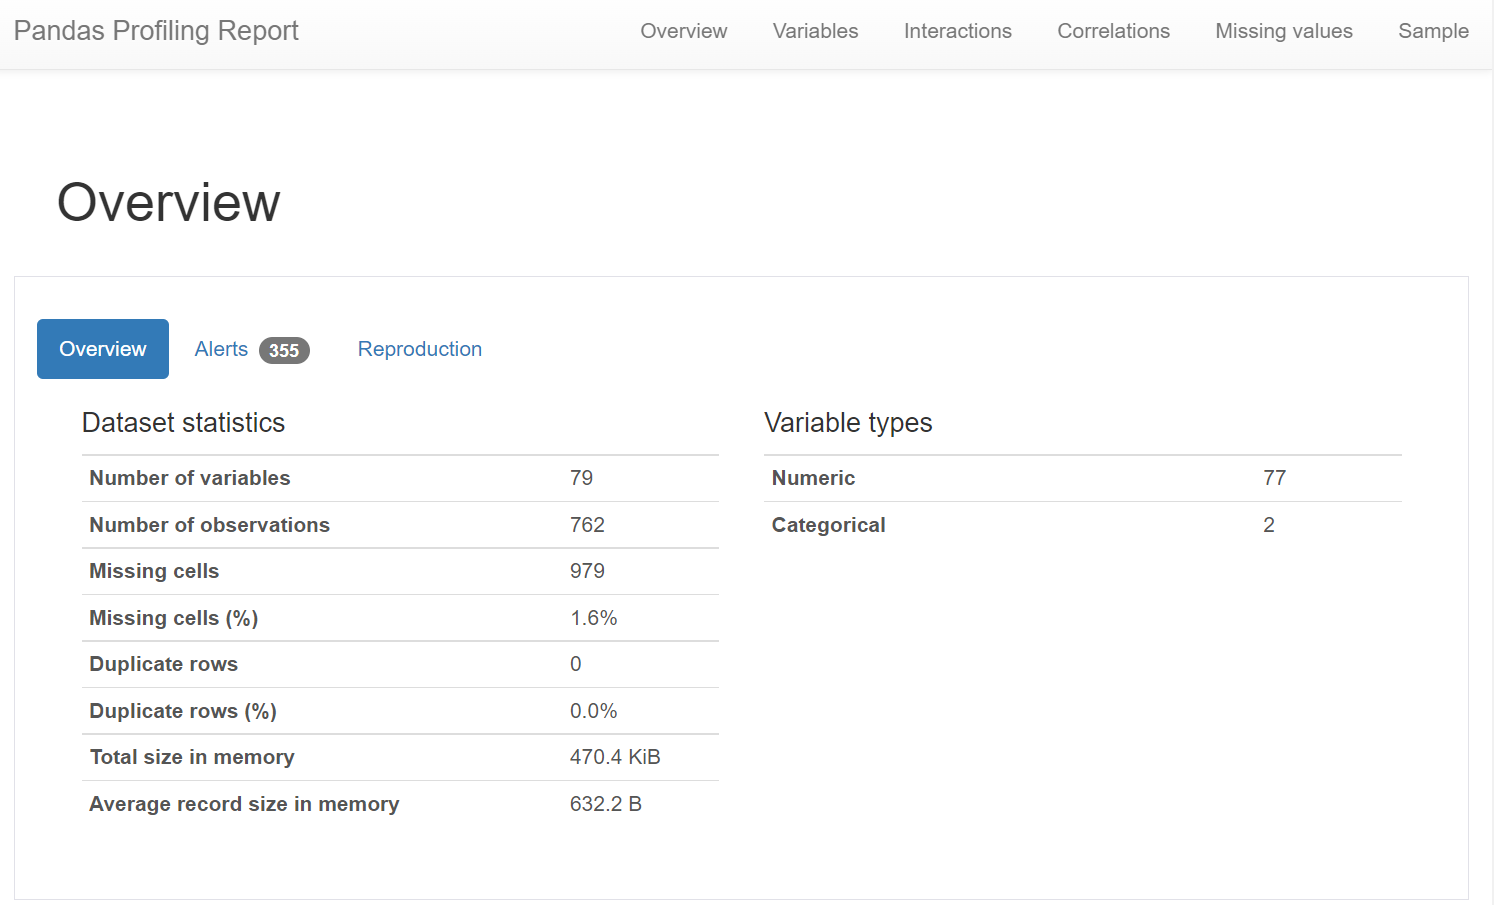

In [ ]:
################################################

Variables and Columns Analysis (Sample Only)

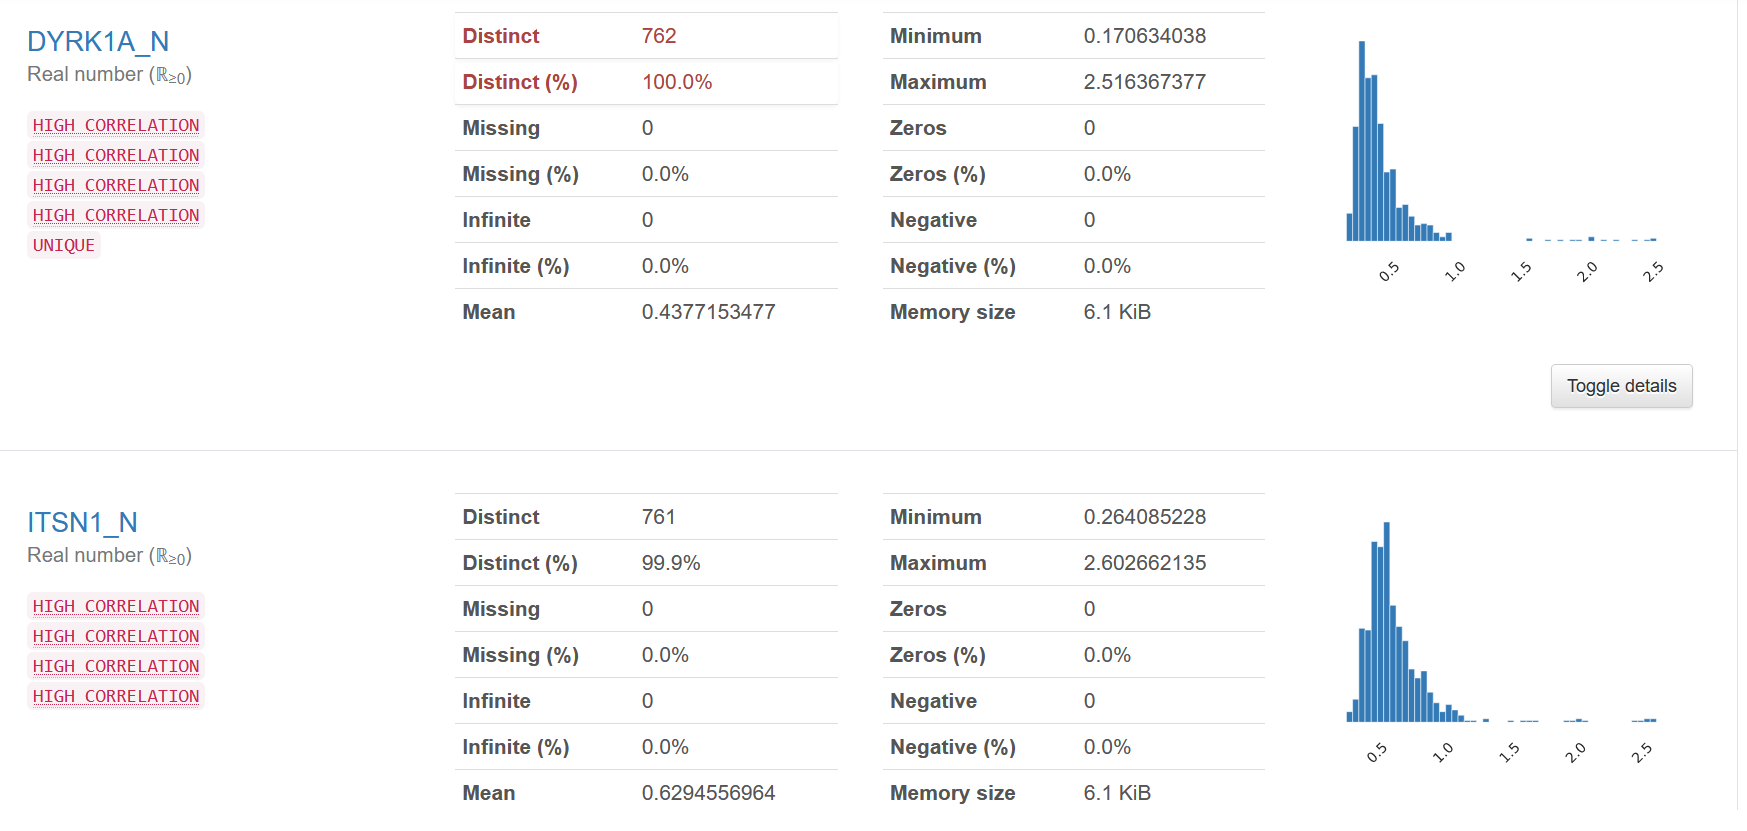

In [ ]:
## Target Variables 

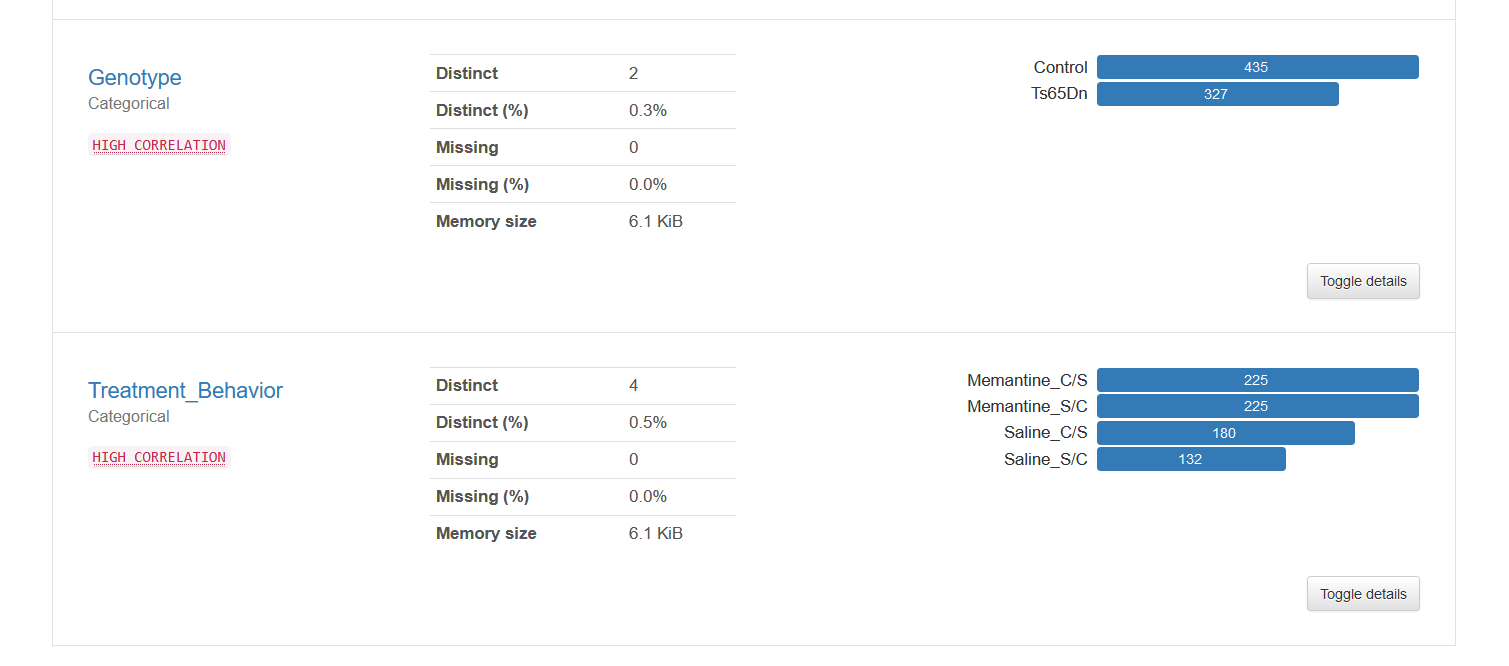

In [ ]:
# Interactions 

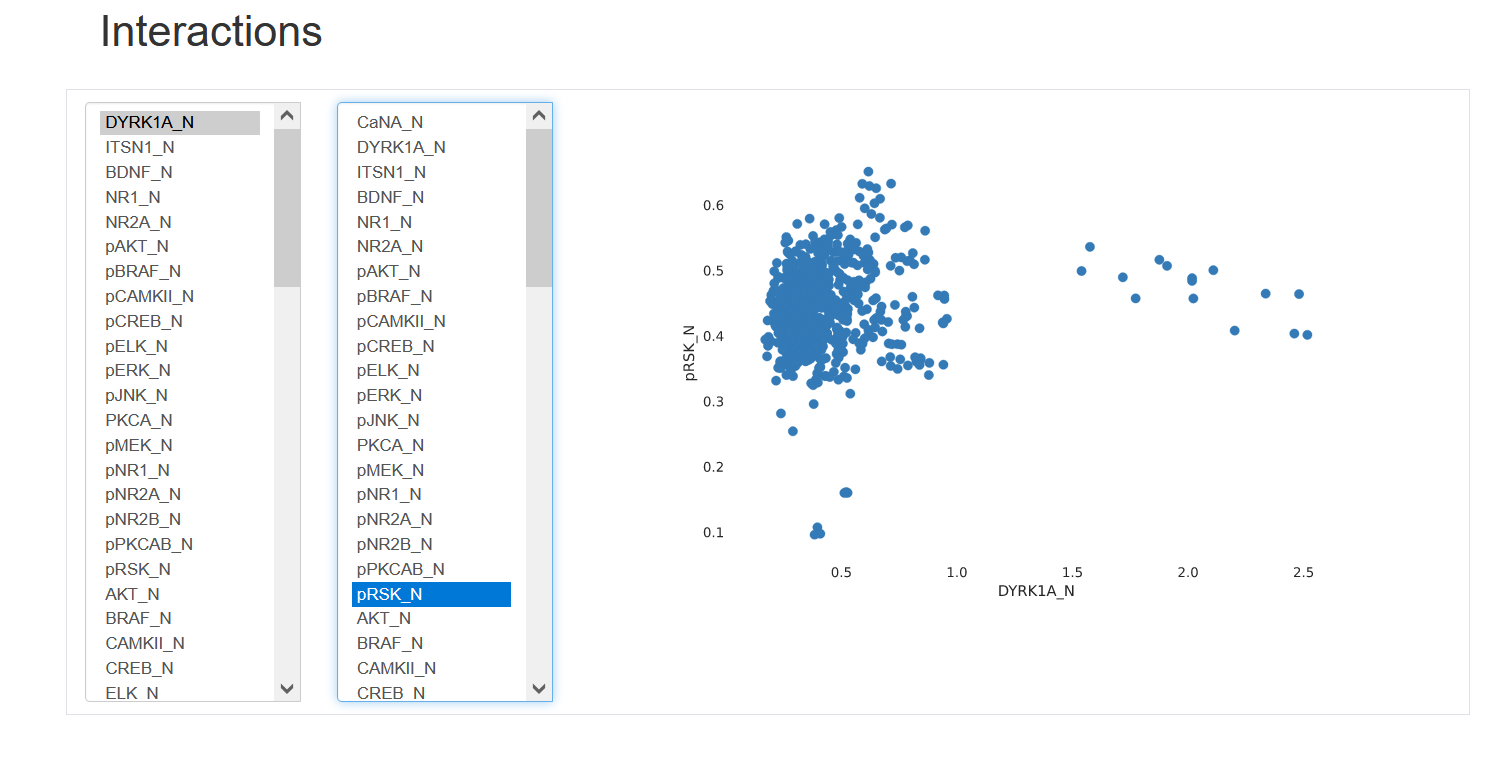